In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from tabulate import tabulate
import joblib
from sklearn.svm import SVC
import pickle
class_label = ['Non-Default(0)','Default(1)'] # env var

In [2]:
data = pd.read_csv('D:\Barath Suresh Docs\PROGRAMMING\MACHINE LEARNING\credit_card_fraud_detection\creditcard.csv')

<Axes: xlabel='Class', ylabel='count'>

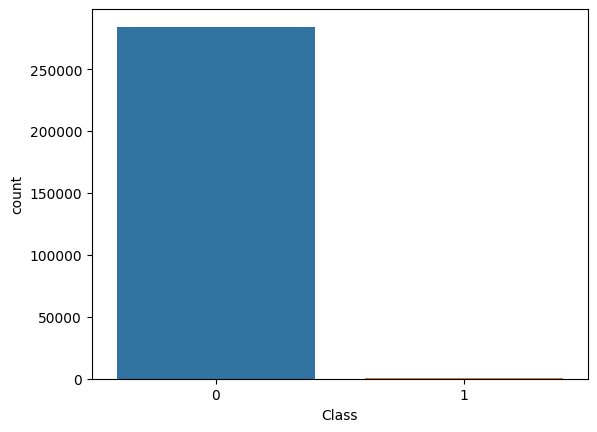

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.countplot(x='Class',data=data)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [5]:
norm_X_train_cnn = (X_train - X_train.mean()) / X_train.std()
norm_X_test_cnn = (X_test - X_train.mean()) / X_train.std()

norm_X_train_cnn = norm_X_train_cnn.values.reshape(-1,30,1)
norm_X_test_cnn = norm_X_test_cnn.values.reshape(-1,30,1)

In [29]:
with os.fdopen(os.open("D:\Barath Suresh Docs\PROGRAMMING\MACHINE LEARNING\credit_card_fraud_detection\Saved Models\SVMClassifierTraining.joblib", os.O_WRONLY | os.O_CREAT)) as file:
    if os.path.getsize("D:\Barath Suresh Docs\PROGRAMMING\MACHINE LEARNING\credit_card_fraud_detection\Saved Models\SVMClassifierTraining.joblib") == 0:
        svm_classifier = SVC(kernel = 'linear', random_state = 0)
        svm_classifier.fit(X_train, Y_train)
        joblib.dump(svm_classifier,filename="D:\Barath Suresh Docs\PROGRAMMING\MACHINE LEARNING\credit_card_fraud_detection\Saved Models\SVMClassifierTraining.joblib")
    else:
        svm_classifier = joblib.load("D:\Barath Suresh Docs\PROGRAMMING\MACHINE LEARNING\credit_card_fraud_detection\Saved Models\SVMClassifierTraining.joblib")
svm_reshaped = svm_classifier.coef_[0].reshape(30,1)
print(svm_reshaped[:25].shape)

(25, 1)


In [32]:
model_20 = keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(norm_X_train_cnn.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5), 

    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1, activation='softmax', trainable=False ,weights=[svm_reshaped[:25],svm_classifier.intercept_])
,
])
model_20.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_20 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_21 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_21 (Bat  (None, 28, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 28, 64)           

In [33]:
model_20.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
history = model_20.fit(norm_X_train_cnn, Y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10


c:\Users\barath_suresh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2849/2849 [==============================] - 82s 27ms/step - loss: 0.0000e+00 - accuracy: 0.0017 - val_loss: 0.0000e+00 - val_accuracy: 0.0019
Epoch 2/10
2849/2849 [==============================] - 82s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0017 - val_loss: 0.0000e+00 - val_accuracy: 0.0019
Epoch 3/10
2849/2849 [==============================] - 80s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0017 - val_loss: 0.0000e+00 - val_accuracy: 0.0019
Epoch 4/10
2060/2849 [====================>.........] - ETA: 22s - loss: 0.0000e+00 - accuracy: 0.0017

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model_20.evaluate(X_test, Y_test)
print('Test accuracy:',test_acc)